In [1]:
import numpy as np
import pandas as pd
import datetime

In [2]:
df = pd.read_csv('movies_dataset_processed.csv')
df

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,industry,language,posted_date,release_date,run_time,storyline,title,views,writer,days_to_post,bucket
0,0,4.8,R,John Swab,304,Holywood,English,2023-02-20,2023-01-28,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,"2,794",John Swab,23,6.0
1,1,6.4,TV-PG,Paul Ziller,73,Holywood,English,2023-02-20,2023-02-05,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,"1,002",John Christian Plummer,15,6.0
2,2,5.2,R,Ben Wheatley,"1,427",Holywood,"English,Hindi",2021-04-20,2021-06-18,107,As the world searches for a cure to a disastro...,In the Earth,"14,419",Ben Wheatley,59,7.0
3,3,6.5,R,Benjamin Caron,"1,781",Holywood,English,2023-02-13,2023-02-17,116,"Motivations are suspect, and expectations are ...",Sharper,"18,225","Brian Gatewood, Alessandro Tanaka",4,4.0
4,4,6.9,PG-13,Ravi Kapoor,458,Holywood,English,2023-02-18,2022-12-02,80,An\r\n unmotivated South Asian American rapper...,Four Samosas,"6,912",Ravi Kapoor,78,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9897,9897,7.1,Not Rated,Biren Nag,"1,932",Bolywood,Hindi,1970-01-01,1962-05-11,158,"After a lusty Thakur rapes a young girl, she k...",Bees Saal Baad,"6,076","Dhruva Chatterjee, Dev Kishan",2792,9.0
9898,9898,7.0,G,Guy Hamilton,"2,544",Holywood,"English,German,Polish,French",1970-01-01,1969-09-17,132,Historical reenactment of the air war in the e...,Battle of Britain,"9,319","James Kennaway, Wilfred Greatorex, Derek Dempster",106,8.0
9899,9899,5.6,R,Barbara Topsøe-Rothenborg,"12,284",Holywood,"Spanish,German,English",2016-05-26,1970-01-01,90,"LOVE AT FIRST HICCUP is a charming, innocent, ...",Love at First Hiccup,"36,022","Barbara Topsøe-Rothenborg, Søren Frellesen, De...",16947,10.0
9900,9900,7.1,Not Rated,Biren Nag,"1,932",Bolywood,Hindi,1970-01-01,1962-05-11,158,"After a lusty Thakur rapes a young girl, she k...",Bees Saal Baad,"6,077","Dhruva Chatterjee, Dev Kishan",2792,9.0


In [3]:
df['release_year'] = pd.to_datetime(df['release_date']).dt.year
df['release_year']

0       2023
1       2023
2       2021
3       2023
4       2022
        ... 
9897    1962
9898    1969
9899    1970
9900    1962
9901    1969
Name: release_year, Length: 9902, dtype: int32

In [4]:
cols_to_label_enc = ['appropriate_for', 'director', 'industry']
label_encs = {}
for col in cols_to_label_enc:
    label_encs[col] = {}
    unique_values = df[col].unique()
    for i, value in enumerate(unique_values):
        label_encs[col][value] = i
    df[col] = df[col].apply(lambda x: label_encs[col][x])

In [5]:
df['downloads'] = df['downloads'].apply(lambda x: float(str(x).replace(',', '')))
df['views'] = df['views'].apply(lambda x: float(str(x).replace(',', '')))

In [6]:
df.dtypes

Unnamed: 0           int64
IMDb-rating        float64
appropriate_for      int64
director             int64
downloads          float64
industry             int64
language            object
posted_date         object
release_date        object
run_time             int64
storyline           object
title               object
views              float64
writer              object
days_to_post         int64
bucket             float64
release_year         int32
dtype: object

In [7]:
df_1 = df.drop(['storyline','title','writer','language','posted_date','release_date'],axis=1)

In [8]:
df_1.dtypes

Unnamed: 0           int64
IMDb-rating        float64
appropriate_for      int64
director             int64
downloads          float64
industry             int64
run_time             int64
views              float64
days_to_post         int64
bucket             float64
release_year         int32
dtype: object

### Split the data into train and test

In [9]:
X = df_1[['IMDb-rating', 'appropriate_for', 'director', 'downloads', 'industry', 'run_time', 'views', 'release_year']]
y = df_1['days_to_post']


In [10]:
X

,IMDb-rating,appropriate_for,director,downloads,industry,run_time,views,release_year
0,4.8,0,0,304.0,0,105,2794.0,2023
1,6.4,1,1,73.0,0,84,1002.0,2023
2,5.2,0,2,1427.0,0,107,14419.0,2021
3,6.5,0,3,1781.0,0,116,18225.0,2023
4,6.9,2,4,458.0,0,80,6912.0,2022
...,...,...,...,...,...,...,...,...
9897,7.1,4,5156,1932.0,1,158,6076.0,1962
9898,7.0,10,5151,2544.0,0,132,9319.0,1969
9899,5.6,0,375,12284.0,0,90,36022.0,1970
9900,7.1,4,5156,1932.0,1,158,6077.0,1962


In [11]:
y

0          23
1          15
2          59
3           4
4          78
        ...  
9897     2792
9898      106
9899    16947
9900     2792
9901      106
Name: days_to_post, Length: 9902, dtype: int64

In [12]:
from sklearn import model_selection

In [13]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.15)

In [14]:
from xgboost import XGBRegressor

In [15]:
xg_reg = XGBRegressor(verbosity=0)

In [16]:
xg_reg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [17]:
train_score = xg_reg.score(X_train,y_train)
print(train_score)

test_score = xg_reg.score(X_test, y_test)
print(test_score)

0.9973202052899273
0.9591071615893504


In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
cv_score = cross_val_score(xg_reg,X_train,y_train,cv=10)
print("C-V Mean score", cv_score.mean())

C-V Mean score 0.9393372168119886


In [20]:
y_pred = xg_reg.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
mse = mean_squared_error(y_test,y_pred)
print("MSE: ", mse)

MSE:  461303.7216631399


In [23]:
test_score = xg_reg.score(X_test,y_test)
print(test_score)

0.9591071615893504


In [24]:
rmse = np.sqrt(mse)
print("RMSE: %0.2f" %(rmse))

RMSE: 679.19


In [25]:
model = XGBRegressor(objective = "reg:squarederror")

In [26]:
scores = cross_val_score(model, X, y, 
                        scoring="neg_mean_squared_error",
                        cv = 10)

In [27]:
scores

array([   -96350.34581948,   -150904.79297731,    -51806.09925386,
          -35103.31912036,    -44392.22877692,   -517861.30785679,
        -1325503.09452541,  -1026637.41424982,  -1385652.2932629 ,
       -15216207.1002097 ])

In [28]:
rmse = np.sqrt(-scores)

In [29]:
rmse

array([ 310.40352095,  388.46466117,  227.60953243,  187.35879782,
        210.69463395,  719.625811  , 1151.30495288, 1013.23117513,
       1177.13732982, 3900.79570091])

In [30]:
from sklearn.metrics import r2_score

In [31]:
mse = mean_squared_error(y_test,y_pred)
print("MSE: ", mse)
r2 = r2_score(y_test,y_pred)
r2

MSE:  461303.7216631399


0.9591071615893504

### XGBoost from scratch

In [32]:
class Node:
    def __init__(self, data, target):
        self.left = None
        self.right = None
        self.data = data
        self.target = target
        self.split_feature = None
        self.split_value = None
        self.prediction = target.mean()  # Initialize to mean target value of leaf node

    def predict(self, data):
        if len(data.shape) == 1:
            data = data.reshape(1, -1)
        
        if self.prediction is not None:
            return self.prediction
        elif self.left is None and self.right is None:
            return self.target.mean()  # return the mean target value of the leaf
        else:
            left_mask = data[:, self.split_feature] <= self.split_value
            right_mask = data[:, self.split_feature] > self.split_value
            left_data = data[left_mask]
            right_data = data[right_mask]
            left_pred = self.left.predict(left_data)
            right_pred = self.right.predict(right_data)
            y_pred = np.zeros(len(data))
            y_pred[left_mask] = left_pred
            y_pred[right_mask] = right_pred
            return y_pred


class XGBoostRegressor_self:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2, reg_lambda=1, reg_alpha=0):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.reg_lambda = reg_lambda
        self.reg_alpha = reg_alpha
        self.trees = []
        self.weights = []
        
    def _mse(self, target):
        return np.mean((target - np.mean(target)) ** 2)
    
    def _split(self, data, target):
        m, n = data.shape
        best_mse = np.inf
        best_feature = None
        best_value = None
        
        for feature in range(n):
            for value in np.unique(data[:, feature]):
                left_target = target[data[:, feature] <= value]
                right_target = target[data[:, feature] > value]
                
                if len(left_target) < self.min_samples_split or len(right_target) < self.min_samples_split:
                    continue
                
                mse = len(left_target) / m * self._mse(left_target) + len(right_target) / m * self._mse(right_target)
                
                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature
                    best_value = value
        
        return best_feature, best_value
    
    def _build_tree(self, data, target, depth):
        node = Node(data, target)

        if depth == self.max_depth or len(data) < self.min_samples_split:
            node.prediction = np.mean(target)
            return node.prediction

        feature, value = self._split(data, target)
        left_data, left_target = data[data[:, feature] <= value], target[data[:, feature] <= value]
        right_data, right_target = data[data[:, feature] > value], target[data[:, feature] > value]

        node.split_feature = feature
        node.split_value = value

        node.left = self._build_tree(left_data, left_target, depth+1)
        node.right = self._build_tree(right_data, right_target, depth+1)

        return node

    def fit(self, data, target):
        m, n = data.shape
        y_pred = np.zeros(m)

        for i in range(self.n_estimators):
            gradient = 2 * (target - y_pred)
            tree = self._build_tree(data, gradient, depth=0)
            self.trees.append(tree)

            update = tree.predict(data) 
            y_pred += self.learning_rate * update

    def predict(self, data):
        m = data.shape[0]
        y_pred = np.zeros(m)

        for tree in self.trees:
            update = tree.predict(data) 
            y_pred += self.learning_rate * update

        return y_pred


In [33]:
model = XGBoostRegressor_self(n_estimators=100,learning_rate=0.1,max_depth=3,min_samples_split=2,reg_lambda=1,reg_alpha=0)

In [34]:
model.fit(X_train.values,y_train.values)

In [35]:
mseScore = []
r2Score = []
lrate = []

for lr in [0.02, 0.04,0.06, 0.08, 0.1, 0.2, 0.4, 0.6, 0.8]:
    reg = XGBRegressor(n_estimators=100,learning_rate=lr,max_depth=3,reg_lambda=1,reg_alpha=0)
    reg.fit(X_train,y_train)
    y_pred_test = reg.predict(X_test)
        
    score = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test,y_pred_test)

    mseScore.append(score)
    r2Score.append(r2)
    lrate.append(lr)

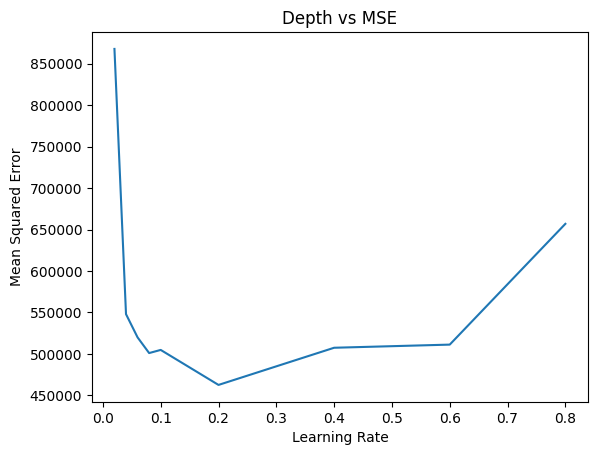

In [36]:
import matplotlib.pyplot as plt

# create scatter plot
plt.plot(lrate, mseScore)

# add labels and title
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error')
plt.title('Depth vs MSE')

# show plot
plt.show()

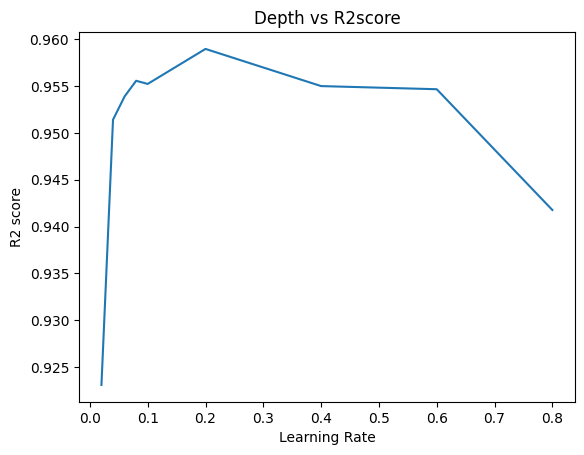

In [37]:
plt.plot(lrate, r2Score)

# add labels and title
plt.xlabel('Learning Rate')
plt.ylabel('R2 score')
plt.title('Depth vs R2score')

# show plot
plt.show()

In [38]:
mseScore = []
r2Score = []
depths = []

for depth in range(2,11):
    reg = XGBRegressor(n_estimators=100,learning_rate=0.2,max_depth=depth,reg_lambda=1,reg_alpha=0)
    reg.fit(X_train,y_train)
    y_pred_test = reg.predict(X_test)
        
    score = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test,y_pred_test)

    mseScore.append(score)
    r2Score.append(r2)
    depths.append(depth)

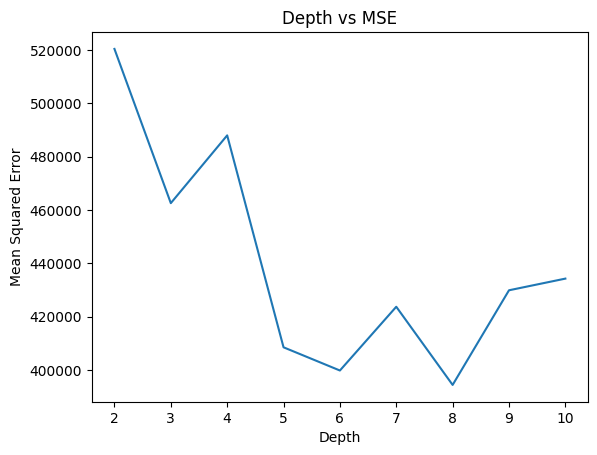

In [39]:
plt.plot(depths, mseScore)

# add labels and title
plt.xlabel('Depth')
plt.ylabel('Mean Squared Error')
plt.title('Depth vs MSE')

# show plot
plt.show()

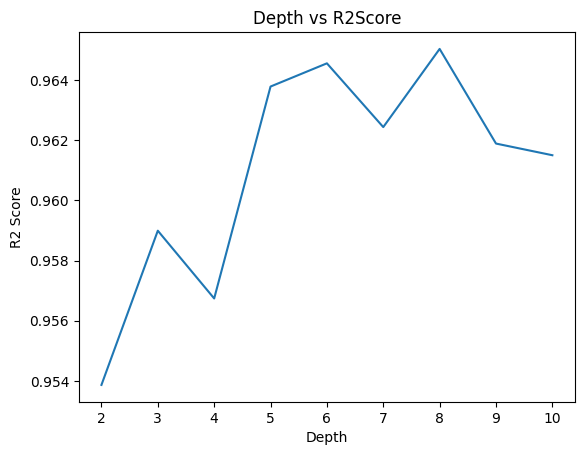

In [40]:
plt.plot(depths, r2Score)
plt.xlabel('Depth')
plt.ylabel('R2 Score')
plt.title('Depth vs R2Score')

# show plot
plt.show()

In [41]:
reg = XGBRegressor(n_estimators=100,learning_rate=0.4,max_depth=3,reg_lambda=1,reg_alpha=0)
reg.fit(X_train,y_train)
y_pred_test = reg.predict(X_test)

mse = mean_squared_error(y_test,y_pred_test)
print("MSE: ", mse)
r2 = r2_score(y_test,y_pred_test)
print("R2 Score: ", r2)

MSE:  507439.15464647935
R2 Score:  0.9550174291259069


In [53]:
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_tree

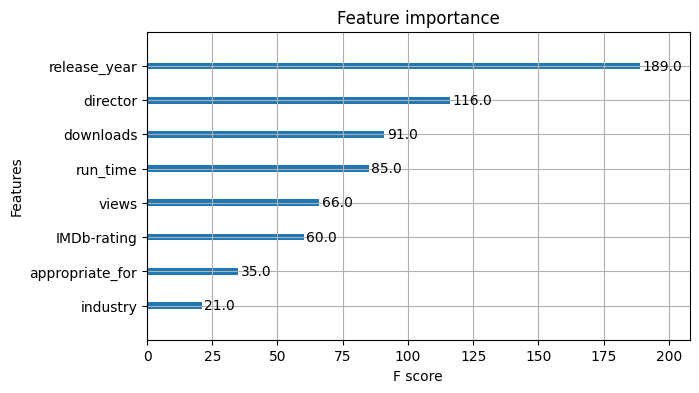

In [55]:
fig, ax = plt.subplots(figsize=(7,4))
xgb.plot_importance(reg, ax=ax)
plt.show()

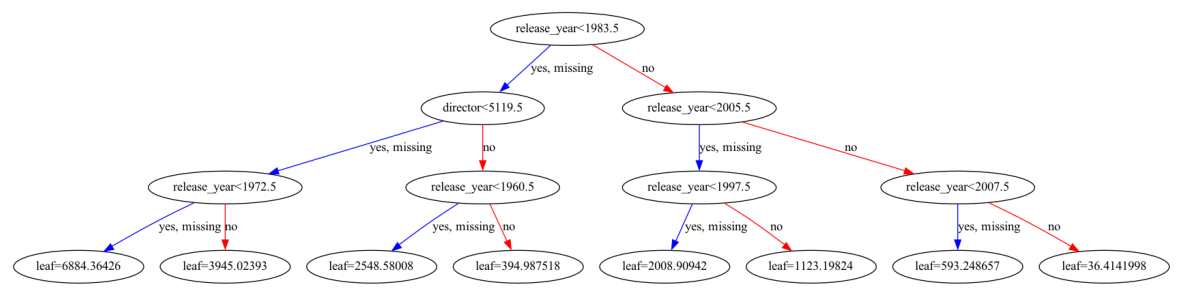

In [58]:
fig, ax = plt.subplots(figsize=(15, 15))
xgb.plot_tree(reg, ax=ax)
plt.show()